In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datasets_35901_52633_winequalityN.csv to datasets_35901_52633_winequalityN.csv
User uploaded file "datasets_35901_52633_winequalityN.csv" with length 390376 bytes


In [2]:
uploaded
import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['datasets_35901_52633_winequalityN.csv'].decode('utf-8')))

In [3]:
print(data.head(20))
print(data.isnull().sum())
df=data.fillna(axis=0,method="ffill")

     type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0   white            7.0              0.27  ...       0.45      8.8        6
1   white            6.3              0.30  ...       0.49      9.5        6
2   white            8.1              0.28  ...       0.44     10.1        6
3   white            7.2              0.23  ...       0.40      9.9        6
4   white            7.2              0.23  ...       0.40      9.9        6
5   white            8.1              0.28  ...       0.44     10.1        6
6   white            6.2              0.32  ...       0.47      9.6        6
7   white            7.0              0.27  ...       0.45      8.8        6
8   white            6.3              0.30  ...       0.49      9.5        6
9   white            8.1              0.22  ...       0.45     11.0        6
10  white            8.1              0.27  ...       0.56     12.0        5
11  white            8.6              0.23  ...       0.53      9.7        5

In [4]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
import keras
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
print(df['type'])

Using TensorFlow backend.


0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


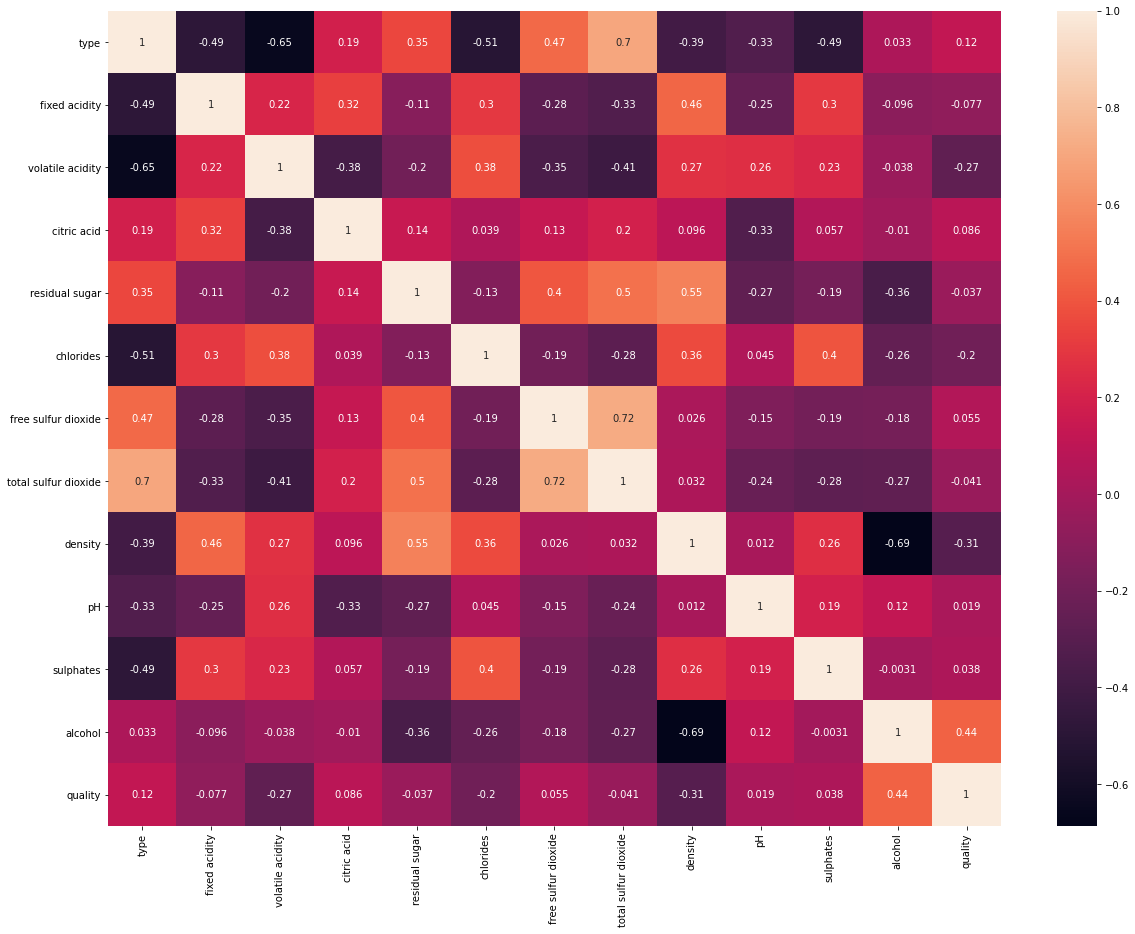

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

X=df.drop(['quality','fixed acidity','volatile acidity','residual sugar','chlorides','total sulfur dioxide','density'],axis=1)
y=df['quality']
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X.shape

(6497, 6)

In [9]:

classifier=Sequential()
classifier.add(Dense(output_dim=10,init='normal',activation='relu',input_dim=6))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim=10,init='normal',activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim=1,init='normal',activation='linear'))
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

classifier.fit(X_train,y_train,batch_size=50,nb_epoch=50)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=6, units=10, kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="normal")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="normal")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
5197/5197 [==============================] - 0s 47us/step - loss: 28.9821 - mean_squared_error: 28.9821
Epoch 2/50
5197/5197 [==============================] - 0s 26us/step - loss: 5.8312 - mean_squared_error: 5.8312
Epoch 3/50
5197/5197 [==============================] - 0s 25us/step - loss: 3.6029 - mean_squared_error: 3.6029
Epoch 4/50
5197/5197 [==============================] - 0s 24us/step - loss: 3.1335 - mean_squared_error: 3.1335
Epoch 5/50
5197/5197 [==============================] - 0s 26us/step - loss: 3.0708 - mean_squared_error: 3.0708
Epoch 6/50
5197/5197 [==============================] - 0s 24us/step - loss: 3.1327 - mean_squared_error: 3.1327
Epoch 7/50
5197/5197 [==============================] - 0s 25us/step - loss: 2.9913 - mean_squared_error: 2.9913
Epoch 8/50
5197/5197 [==============================] - 0s 26us/step - loss: 2.8895 - mean_squared_error: 2.8895
Epoch 9/50
5197/5197 [==============================] - 0s 28us/step - loss: 2.7989 - mean_squ

In [10]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error
import seaborn as sns
cm=confusion_matrix(y_test,y_pred.round())
print(mean_squared_error(y_test,y_pred.round()))


0.7684615384615384


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)
print(f'MSE ={mean_squared_error(y_pred_lr,y_test)}')


MSE =0.5721453355324311


In [16]:
dt=DecisionTreeRegressor(min_samples_split=10,)
dt.fit(X_train,y_train)

y_pred_dt=dt.predict(X_test)
print(f'MSE ={mean_squared_error(y_pred_dt,y_test)}')

MSE =0.660402738773572


In [15]:
rf=RandomForestRegressor(n_estimators=25)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)
print(f'MSE ={mean_squared_error(y_pred_rf,y_test)}')

MSE =0.41806553846153854
